In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
df=pd.read_csv('../input/creditcard-dataset/creditcard.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


# Data preprocessing

In [4]:
# Finding shape of data

df.shape

(150002, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [6]:
df['NumberOfDependents'].value_counts()

0.0     75950
1.0     23027
2.0     17082
0       10952
3.0      8255
1        3289
4.0      2497
2        2440
3        1228
5.0       636
4         365
6.0       133
5         110
7.0        45
6          25
8.0        20
7           6
10.0        5
8           4
9.0         3
9           2
Good        1
13.0        1
Bad         1
20.0        1
Name: NumberOfDependents, dtype: int64

In [7]:
# Finding the row where string present in feature

print(np.where(df['NumberOfDependents']=='Good'))
print(np.where(df['NumberOfDependents']=='Bad'))

(array([150000]),)
(array([150001]),)


In [8]:
# Dropping the object row

df.drop(index=[150000,150001],inplace=True)

In [9]:
# Changing the datatype

df['NumberOfDependents']=df['NumberOfDependents'].astype('float')

<AxesSubplot:>

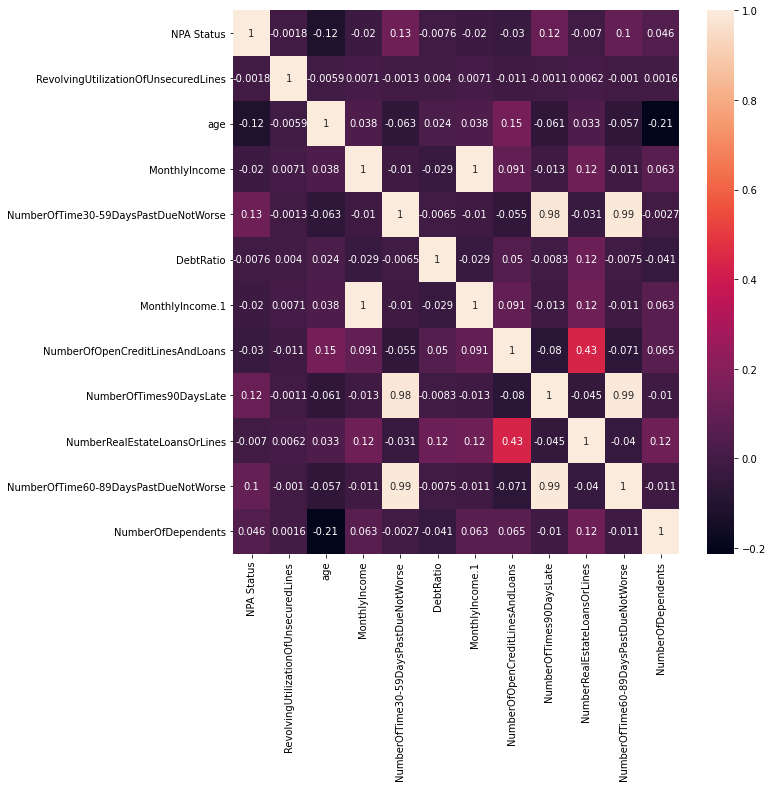

In [10]:
# Visually checking co-relation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
# Monthly income feature repeated 2 times. So, dropping it

df.drop('MonthlyIncome.1',axis=1,inplace=True)

In [12]:
# Finding Null values

df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [13]:
df['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [14]:
df['NumberOfDependents'].mode()[0]

0.0

In [15]:
pd.crosstab(df['Good_Bad'],df['NumberOfDependents'])

NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0
Good_Bad,,,,,,,,,,,,,
Bad,5095,1935,1584,837,297,68,24,5,2,0,0,0,0
Good,81807,24381,17938,8646,2565,678,134,46,22,5,5,1,1


In [16]:
# Replace nan with mode

df['NumberOfDependents']=df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

In [17]:
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
Good_Bad                                    0
dtype: int64

 In monthly income feature we can't just fill nan with its mean,median or mode because income is based on Occupation. So taking the mean of income respective to occupation's individual category and filling the NaN.

In [18]:
# Creating a DataFrame which consist of NaN
df_null=df[df['MonthlyIncome'].isnull()]
df_null.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
6,0.0,0.305682,57.0,Female,South,NaN,Ownhouse,Self_Emp,PhD,0.0,5710.0,8.0,0.0,3.0,0.0,0.0,Good
8,0.0,0.116951,27.0,Female,South,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,46.0,2.0,0.0,0.0,0.0,0.0,Good
16,0.0,0.061086,78.0,Female,South,NaN,Ownhouse,Self_Emp,Graduate,0.0,2058.0,10.0,0.0,2.0,0.0,0.0,Good
32,0.0,0.083418,62.0,Male,South,NaN,Ownhouse,Self_Emp,Graduate,0.0,977.0,6.0,0.0,1.0,0.0,0.0,Good
41,0.0,0.072898,81.0,Female,South,NaN,Ownhouse,Self_Emp,Graduate,0.0,75.0,7.0,0.0,0.0,0.0,0.0,Good


In [19]:
# Finding the length of nan of occupation's individual category

print('Self-emp : ',len(df_null[df_null['Occupation']=='Self_Emp']))
print('Officer1 : ',len(df_null[df_null['Occupation']=='Officer1']))
print('Officer2 : ',len(df_null[df_null['Occupation']=='Officer2']))
print('Officer3 : ',len(df_null[df_null['Occupation']=='Officer3']))
print('Non-officer : ',len(df_null[df_null['Occupation']=='Non-officer']))

Self-emp :  12726
Officer1 :  3106
Officer2 :  2600
Officer3 :  3236
Non-officer :  8063


In [20]:
# Creating a dataframe by dropping nan (purpose is to find mean)

df_notna=df.dropna()
df_notna.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,Good


In [21]:
# 3rd index is monthly income mean

df_notna[df_notna['Occupation']=='Self_Emp'].mean()

NPA Status                                 0.069994
RevolvingUtilizationOfUnsecuredLines       7.297408
age                                       51.342207
MonthlyIncome                           6640.172718
NumberOfTime30-59DaysPastDueNotWorse       0.381533
DebtRatio                                 24.741118
NumberOfOpenCreditLinesAndLoans            8.771356
NumberOfTimes90DaysLate                    0.214030
NumberRealEstateLoansOrLines               1.058883
NumberOfTime60-89DaysPastDueNotWorse       0.191555
NumberOfDependents                         0.847227
dtype: float64

In [22]:
# Monthly income mean of all occupation's individual category

self_emp_income_mean=df_notna[df_notna['Occupation']=='Self_Emp'].mean()[3]
Officer1_income_mean=df_notna[df_notna['Occupation']=='Officer1'].mean()[3]
Officer2_income_mean=df_notna[df_notna['Occupation']=='Officer2'].mean()[3]
Officer3_income_mean=df_notna[df_notna['Occupation']=='Officer3'].mean()[3]
Nonofficer_income_mean=df_notna[df_notna['Occupation']=='Non-officer'].mean()[3]
print('self_emp_income_mean :',self_emp_income_mean,
     '\nOfficer1_income_mean :',Officer1_income_mean,
     '\nOfficer2_income_mean :',Officer2_income_mean,
     '\nOfficer3_income_mean :',Officer3_income_mean,
     '\nNonofficer_income_mean :',Nonofficer_income_mean)

self_emp_income_mean : 6640.17271842771 
Officer1_income_mean : 6602.209072814729 
Officer2_income_mean : 6451.970558091866 
Officer3_income_mean : 6791.097177481209 
Nonofficer_income_mean : 6764.950075642965


In [23]:
# Replacing NaN of its respective mean with new DataFrame

df_selfemp=df[df['Occupation']=='Self_Emp']
df_selfemp.fillna(self_emp_income_mean,inplace=True)
df_officer1=df[df['Occupation']=='Officer1']
df_officer1.fillna(Officer1_income_mean,inplace=True)
df_Officer2=df[df['Occupation']=='Officer2']
df_Officer2.fillna(Officer2_income_mean,inplace=True)
df_Officer3=df[df['Occupation']=='Officer3']
df_Officer3.fillna(Officer3_income_mean,inplace=True)
df_Nonofficer=df[df['Occupation']=='Non-officer']
df_Nonofficer.fillna(Nonofficer_income_mean,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [24]:
# Combining DataFrames

frames=[df_selfemp,df_officer1,df_Officer2,df_Officer3,df_Nonofficer]
df=pd.concat(frames)
df.head(10)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.000000,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.000000,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.000000,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.000000,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.000000,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,Good
5,0.0,0.213179,74.0,Female,South,3500.000000,Ownhouse,Self_Emp,Graduate,0.0,0.375607,3.0,0.0,1.0,0.0,1.0,Good
6,0.0,0.305682,57.0,Female,South,6640.172718,Ownhouse,Self_Emp,PhD,0.0,5710.000000,8.0,0.0,3.0,0.0,0.0,Good
7,0.0,0.754464,39.0,Female,South,3500.000000,Ownhouse,Self_Emp,Post-Grad,0.0,0.209940,8.0,0.0,0.0,0.0,0.0,Good
8,0.0,0.116951,27.0,Female,South,6640.172718,Ownhouse,Self_Emp,Post-Grad,0.0,46.000000,2.0,0.0,0.0,0.0,0.0,Good
9,0.0,0.189169,57.0,Female,South,23684.000000,Ownhouse,Self_Emp,Graduate,0.0,0.606291,9.0,0.0,4.0,0.0,2.0,Good


In [25]:
df.shape

(150000, 17)

In [26]:
df.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Good_Bad                                0
dtype: int64

In [27]:
# Seperating categorical features

df_cat=df.select_dtypes(include='object')
df_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,Male,South,Ownhouse,Self_Emp,Matric,Bad
1,Female,South,Ownhouse,Self_Emp,Graduate,Good
2,Female,South,Ownhouse,Self_Emp,PhD,Good
3,Female,South,Ownhouse,Self_Emp,Professional,Good
4,Male,South,Ownhouse,Self_Emp,Post-Grad,Good


In [28]:
# Categorical feature value_counts

for i in df_cat.columns:
    print(df[i].value_counts())

Male      92304
Female    57696
Name: Gender, dtype: int64
Central    43956
North      34099
West       27899
South      23495
East       20551
Name: Region, dtype: int64
Ownhouse    85953
Rented      64047
Name: Rented_OwnHouse, dtype: int64
Self_Emp       64116
Non-officer    41113
Officer3       16274
Officer1       15164
Officer2       13333
Name: Occupation, dtype: int64
Professional    50920
Graduate        39755
Post-Grad       37214
Matric          15810
PhD              6301
Name: Education, dtype: int64
Good    139974
Bad      10026
Name: Good_Bad, dtype: int64


In [29]:
# Encoding on categorical feature

encoder=LabelEncoder()

def label_encode(df):
    for i in df_cat.columns:
        df[i]=encoder.fit_transform(df[i])

In [30]:
label_encode(df)
df.head(10)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,1,3,9120.000000,0,4,1,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,0
1,0.0,0.957151,40.0,0,3,2600.000000,0,4,0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,1
2,0.0,0.658180,38.0,0,3,3042.000000,0,4,2,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,1
3,0.0,0.233810,30.0,0,3,3300.000000,0,4,4,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,1
4,0.0,0.907239,49.0,1,3,63588.000000,0,4,3,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,1
5,0.0,0.213179,74.0,0,3,3500.000000,0,4,0,0.0,0.375607,3.0,0.0,1.0,0.0,1.0,1
6,0.0,0.305682,57.0,0,3,6640.172718,0,4,2,0.0,5710.000000,8.0,0.0,3.0,0.0,0.0,1
7,0.0,0.754464,39.0,0,3,3500.000000,0,4,3,0.0,0.209940,8.0,0.0,0.0,0.0,0.0,1
8,0.0,0.116951,27.0,0,3,6640.172718,0,4,3,0.0,46.000000,2.0,0.0,0.0,0.0,0.0,1
9,0.0,0.189169,57.0,0,3,23684.000000,0,4,0,0.0,0.606291,9.0,0.0,4.0,0.0,2.0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149998
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  int64  
 4   Region                                150000 non-null  int64  
 5   MonthlyIncome                         150000 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  int64  
 7   Occupation                            150000 non-null  int64  
 8   Education                             150000 non-null  int64  
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [32]:
print(df['Gender'].value_counts())
print(df['Region'].value_counts())
print(df['Rented_OwnHouse'].value_counts())
print(df['Occupation'].value_counts())
print(df['Education'].value_counts())
print(df['Good_Bad'].value_counts())

1    92304
0    57696
Name: Gender, dtype: int64
0    43956
2    34099
4    27899
3    23495
1    20551
Name: Region, dtype: int64
0    85953
1    64047
Name: Rented_OwnHouse, dtype: int64
4    64116
0    41113
3    16274
1    15164
2    13333
Name: Occupation, dtype: int64
4    50920
0    39755
3    37214
1    15810
2     6301
Name: Education, dtype: int64
1    139974
0     10026
Name: Good_Bad, dtype: int64


In [33]:
x=df.drop('Good_Bad',axis=1)
y=df['Good_Bad']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Good_Bad', ylabel='count'>

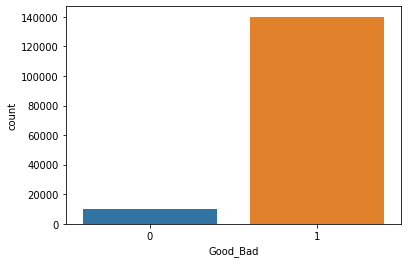

In [34]:
sns.countplot(y)

# Imbalanced data to balanced data

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
ro=RandomOverSampler(0.75)

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [37]:
x_ro,y_ro = ro.fit_resample(x,y)

In [38]:
print(x_ro.shape,y_ro.shape)

(244954, 16) (244954,)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Good_Bad', ylabel='count'>

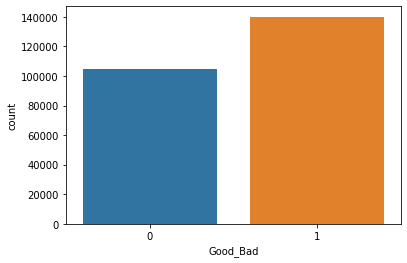

In [39]:
sns.countplot(y_ro)

In [40]:
pd.crosstab(y_ro,x_ro['NumberOfDependents'])

NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0
Good_Bad,,,,,,,,,,,,,
0,54999,20368,16765,8735,3090,721,241,41,20,0,0,0,0
1,85552,24381,17938,8646,2565,678,134,46,22,5,5,1,1


# Feature Scaling

In [43]:
fea_scaling=StandardScaler()
x_scaled=pd.DataFrame(fea_scaling.fit_transform(x_ro),columns=x_ro.columns)
x_scaled.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.154703,-0.022405,-0.332270,0.785111,0.495243,0.261614,-0.867959,0.985463,-0.754293,0.102297,-0.185297,0.892280,-0.120690,4.020611,-0.106244,1.027926
1,-0.866023,-0.021512,-0.678882,-1.273705,0.495243,-0.348996,-0.867959,0.985463,-1.378539,-0.146584,-0.185680,-0.788421,-0.120690,-0.807027,-0.106244,0.161810
2,-0.866023,-0.022910,-0.817527,-1.273705,0.495243,-0.307602,-0.867959,0.985463,-0.130048,-0.022143,-0.185701,-1.161910,0.003748,-0.807027,-0.106244,-0.704305
3,-0.866023,-0.024893,-1.372107,-1.273705,0.495243,-0.283440,-0.867959,0.985463,1.118442,-0.146584,-0.185728,-0.601676,-0.120690,-0.807027,-0.106244,-0.704305
4,-0.866023,-0.021746,-0.054980,0.785111,0.495243,5.362642,-0.867959,0.985463,0.494197,-0.022143,-0.185735,-0.228187,-0.120690,-0.002421,-0.106244,-0.704305


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_ro,test_size=0.3,random_state=42)

In [45]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

x_train shape : (171467, 16)
y_train shape : (171467,)
x_test shape : (73487, 16)
y_test shape : (73487,)


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Finding the best neighbor value

k=np.arange(2,20)
train_acc=np.empty(len(k))
test_acc=np.empty(len(k))

for i,k in enumerate(k):
    kval=KNeighborsClassifier(k)
    kval.fit(x_train,y_train)
    train_acc[i]=kval.score(x_train,y_train)
    test_acc[i]=kval.score(x_test,y_test)

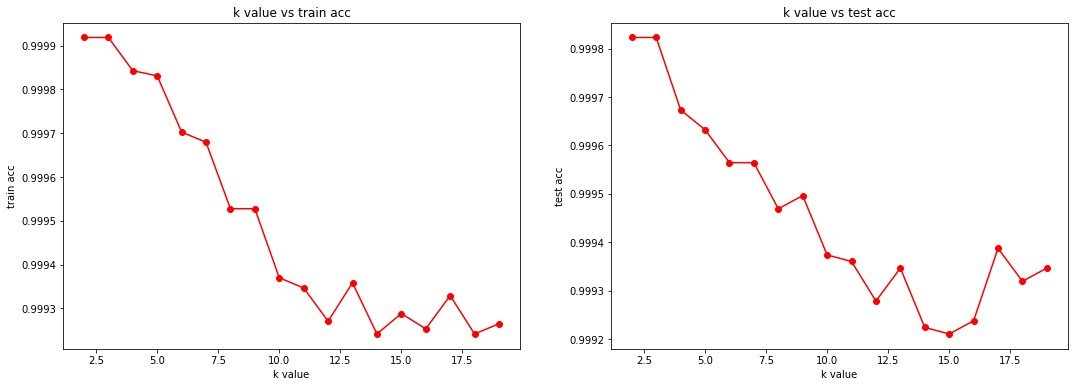

In [49]:
# Visually checking k value

k=np.arange(2,20)
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(k,train_acc,color='r',marker='o')
plt.title('k value vs train acc')
plt.xlabel('k value')
plt.ylabel('train acc')
plt.subplot(1,2,2)
plt.plot(k,test_acc,color='r',marker='o')
plt.title('k value vs test acc')
plt.xlabel('k value')
plt.ylabel('test acc')
plt.show()

In [50]:
# Best k value which can be used for knn

idx=np.where(test_acc==max(test_acc))
k[idx]

array([2, 3])

In [51]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
ypred_knn=knn.predict(x_test)

In [53]:
confusion_matrix(y_test,ypred_knn)

array([[31569,     0],
       [   13, 41905]])

In [54]:
accuracy_score(y_test,ypred_knn)

0.999823097962905

In [55]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31569
           1       1.00      1.00      1.00     41918

    accuracy                           1.00     73487
   macro avg       1.00      1.00      1.00     73487
weighted avg       1.00      1.00      1.00     73487



In [56]:
cross_val_score(knn,x_ro,y_ro,cv=10)

array([0.92653333, 0.92933333, 0.93233333, 0.9254    , 0.92893333,
       0.92793333, 0.93033333, 0.92713333, 0.931     , 0.92046667])

In [57]:
np.mean(cross_val_score(knn,x_ro,y_ro,cv=10))

0.9279399999999999

# DecisionTree

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x_ro,y_ro,test_size=0.3,random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [62]:
ypred_dt=dt.predict(xtest)

In [66]:
dt.score(xtrain,ytrain)

1.0

In [63]:
confusion_matrix(ytest,ypred_dt)

array([[31569,     0],
       [    0, 41918]])

In [65]:
accuracy_score(ytest,ypred_dt)

1.0

# Hyperparameter Tuning Technique on DecisionTree
#### If the model does not works well in test data Hyperparameter Tuning Techniques can be done

In [53]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameters={'criterion':['gini','entropy'],
           'max_depth':np.arange(2,20),
           'min_samples_split':np.arange(2,10),
           'min_samples_leaf':np.arange(2,10)}
parameters

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [92]:
gcv=GridSearchCV(estimator=dt,param_grid=parameters)

In [93]:
gcv.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [94]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [95]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [96]:
dt_gcv=gcv.best_estimator_
dt_gcv.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [97]:
ypred_dt_gcv=dt_gcv.predict(xtest)

In [98]:
confusion_matrix(ytest,ypred_dt_gcv)

array([[31569,     0],
       [    0, 41918]])

In [99]:
np.mean(cross_val_score(dt_gcv,x_ro,y_ro,cv=10))

1.0

# RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [45]:
ypred_rf=rf.predict(xtest)

In [46]:
confusion_matrix(ytest,ypred_rf)

array([[31569,     0],
       [    0, 41918]])

In [47]:
accuracy_score(ytest,ypred_rf)

1.0

In [48]:
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31569
           1       1.00      1.00      1.00     41918

    accuracy                           1.00     73487
   macro avg       1.00      1.00      1.00     73487
weighted avg       1.00      1.00      1.00     73487



In [49]:
cross_val_score(rf,x_ro,y_ro,cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
np.mean(cross_val_score(rf,x_ro,y_ro,cv=10))

1.0

# Hyperparameter Tuning Technique on RandomForest

In [51]:
parameter={'n_estimators':np.arange(100,600,100),
            'criterion':['gini','entropy'],
           'max_depth':np.arange(2,20),
           'min_samples_split':np.arange(2,10),
           'min_samples_leaf':np.arange(2,10)}
parameter

{'n_estimators': array([100, 200, 300, 400, 500]),
 'criterion': ['gini', 'entropy'],
 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [54]:
gs_rf=GridSearchCV(estimator=rf,param_grid=parameter)

In [56]:
#gs_rf.fit(xtrain,ytrain)

In [ ]:
#gs_rf.best_estimator_

In [ ]:
#rf_gs=gs_rf.best_estimator_
#rf_gs.fit(xtrain,ytrain)

In [ ]:
#ypred_randomforest_gridsearch=rf_gs.predict(xtest)

In [ ]:
#confusion_matrix(ytest,ypred_randomforest_gridsearch)